In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Implement Decision tree using CART algorithm.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Model Evaluation
-------------------
Accuracy Score: 0.889

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



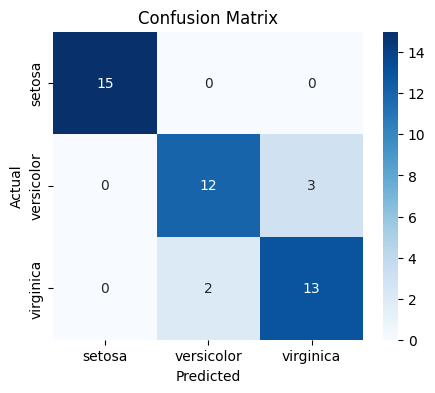

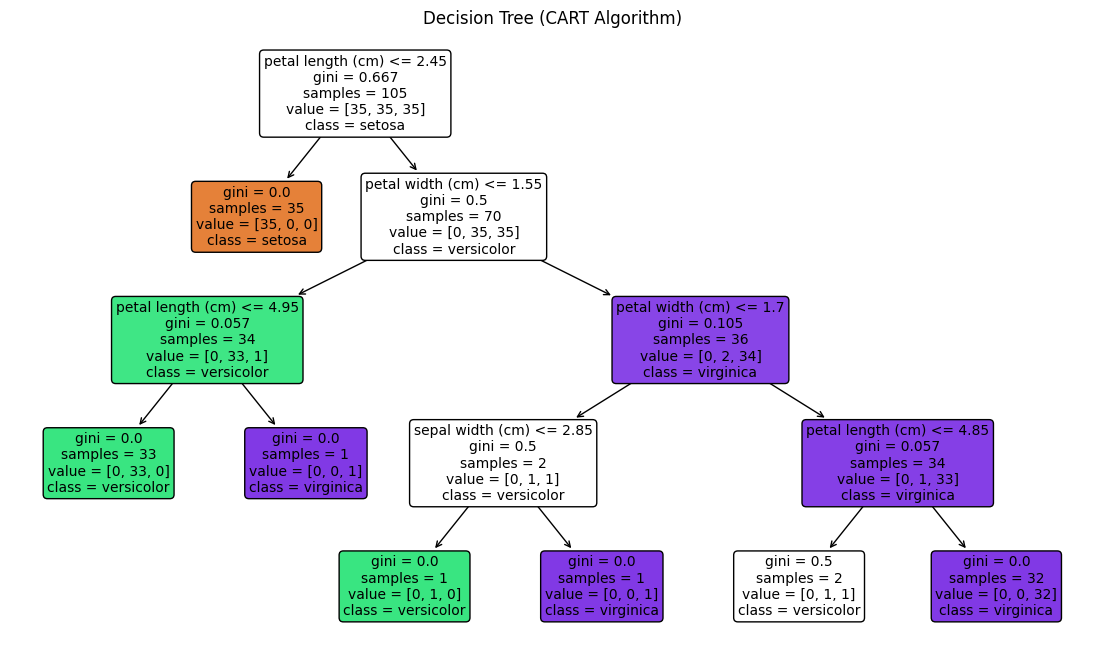

In [6]:
dt_model = DecisionTreeClassifier(
    criterion='gini',      
    max_depth=4,            
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Model Evaluation")
print("-------------------")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(14,8))
plot_tree(dt_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (CART Algorithm)")
plt.show()

## 2. Implement rule-based classification using OneR algorithm.

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

def one_r(X, y, bins=5):
    rules = {}
    best_feature = None
    best_error = float('inf')
    for feature in X.columns:
        X_binned = pd.cut(X[feature], bins=bins, labels=False)
        feature_rule = {}
        for val in X_binned.unique():
            most_common_class = y[X_binned == val].mode()[0]
            feature_rule[val] = most_common_class
        y_pred = X_binned.map(feature_rule)
        error = sum(y_pred != y)
        rules[feature] = feature_rule
        if error < best_error:
            best_error = error
            best_feature = feature
    return best_feature, rules[best_feature], best_error / len(y)

best_feature, rule, error_rate = one_r(X_train, y_train)
print("Best Feature:", best_feature)
print("Rule (Bin → Class):")
for k, v in rule.items():
    print(f"  Bin {k}: Class {iris.target_names[v]}")
print(f"\nTraining Error Rate: {error_rate:.3f}")

def predict_one_r(X, feature, rule, bins=5):
    X_binned = pd.cut(X[feature], bins=bins, labels=False)
    most_common = max(set(rule.values()), key=list(rule.values()).count)
    return X_binned.map(rule).fillna(most_common).astype(int)

y_pred = predict_one_r(X_test, best_feature, rule)
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy:.3f}")


Best Feature: petal width (cm)
Rule (Bin → Class):
  Bin 2: Class versicolor
  Bin 0: Class setosa
  Bin 4: Class virginica
  Bin 3: Class virginica
  Bin 1: Class versicolor

Training Error Rate: 0.029
Test Accuracy: 0.889
